$ \newcommand{\mbf}{\mathbf} $
$ \newcommand{\abs}[1]{\left\vert#1\right\vert} $
$ \newcommand{\setsepa}{\text{\ \large$:$\ }} $
$ \newcommand{\set}[2]{\big\{#1\,\setsepa\,#2\big\}} $
$ \newcommand{\se}[1]{\,\left\{#1\right\}\,} $
# Medidas de tendência central

## $ \S 1 $ Medidas comuns de tendência central

Considere uma lista $ A = \big(y_0,y_1, \dots, y_M\big) $ de valores reais, representando uma amostragem de dados de uma determinada coleção. Em muitos casos, é desejável destilar a amostra a um único número que melhor a representa. As quatro **medidas de tendência central** mais comuns são as definidas abaixo. Para ilustrá-las, seja 
$$
A = \big(0, 1, 2, 0, 0, 2, 0, 1, 1, 0,
0, 2, 1, 0, 0, 3, 0, 2, 0, 1 \big)
$$
uma lista do número de filho(a)s de uma amostra aleatória de $ 20 $ casais da população de uma cidade. Em forma tabular:

| Número de filhos | Freqüência |
|:----------------:|:----------:|
| 0                | 10         |
| 1                | 5          |
| 2                | 4          |
| 3                | 1          |


(a) A **média aritmética** dos valores $ y_i $ é dada por
$$
\bar y = \frac{1}{M+1} \sum_{i=0}^{M} y_i = \frac{y_0 + y_1 + \cdots + y_M}{M + 1}.
$$
No exemplo acima,
$$
\text{média aritmética} = \bar y = \frac{0\cdot 10 + 1\cdot 5 + 2\cdot 4 + 3\cdot 1}{20} = \frac{16}{20} = 0.8\,.
$$

(b) A **mediana** dos valores $ y_i $ é definida como o valor do meio da amostra; se o número de pontos na amostra é par, definimos a mediana como a média aritmética entre os dois valores do meio. No exemplo acima, o número de pontos é $ 20 $, logo
$$
\text{mediana} = \frac{0 + 1}{2} = 0.5\,,
$$
ou seja, ela a média aritmética entre os dois valores do meio, depois que a lista é ordenada de maneira crescente.

(c) A **moda** de $ A $ é o conjunto dos $ y_i $ que ocorrem com a freqüência mais alta na amostragem. No exemplo acima,
$$
\text{moda} = 0,
$$
já que este é o valor mais freqüente. Se numa determinada amostragem o número de casais com $ 0 $ fosse igual ao número com $ 1 $ filho (e as outras freqüências fossem menores), a moda seria o conjunto $ \se{0, 1} $. Num histograma, a moda é indicada pela(s) barra(s) mais alta(s).

(d) O **médio-extremo** (*mid-range*) é a média aritmética entre o maior e o menor valor na amostra. No nosso exemplo portanto,
$$
\text{médio-extremo} = \frac{0+3}{2} = 1.5\,.
$$

**Exemplo:**

Um estudo da Oxfam de 2021 encontrou que as dez pessoas mais ricas do mundo detinham um espólio (patrimônio) combinado maior que aquele das $ 3.1 $ bilhões de pessoas mais pobres. Entre todos os adultos do mundo, a *média aritmética* da riqueza global era de $ 87\,489 $ USD; já a *mediana* era menos de um décimo desta cifra: $ 8\,360 $ USD. Claramente, pela natureza da distribuição da riqueza mundial, a mediana é muito mais apropriada do que a média aritmética como uma medida do patrimônio do adulto "médio".

📝 De maneira geral, a mediana é mais adequada que a média aritmética como medida de tendência central quando a amostragem é distorcida (alguns valores são *outliers*, ou seja, muito diferentes da média) ou quando o número de elementos na amostra é pequeno. A moda é a medida de tendência central mais adequada quando buscamos o valor ou categoria mais comum.

In [19]:
def tendencia_central(ys):
    """
    Dado um array ou lista ys, calcula e retorna (nesta ordem):
        * A média aritmética.
        * A mediana.
        * A moda.
        * O médio-extremo.
    """
    # Calculando a média aritmética:
    S = 0
    M = len(ys) - 1    # O número de medições é M + 1.
    for y in ys:
        S += y
    media_aritmetica = S / (M + 1)
    
    # Calculando a mediana:
    ys.sort()
    meio = M // 2
    if M % 2 == 0:
        mediana = (ys[meio] + ys[meio + 1]) / 2
    else:
        mediana = ys[meio]
    
    # Calculando a moda:
    freqs = dict()
    for y in ys:
        freqs[y] = freqs.get(y, 0) + 1
    freq_max = list(freqs.values())[0]
    moda = set()
    for y, freq in freqs.items():
        if freq == freq_max:
            moda.add(y)
        else:
            break
    if len(moda) == 1:
        moda = moda.pop()
    
    # Calculando o médio-extremo:
    medio_extremo = (max(ys) + min(ys)) / 2
    
    # Imprimindo e retornando o resultado:
    print(f"Média aritmetica: {media_aritmetica}")
    print(f"Mediana: {mediana}")
    print(f"Moda: {moda}")
    print(f"Médio-extremo: {medio_extremo}")
    
    return media_aritmetica, mediana, moda, medio_extremo

In [24]:
# Também podemos importar do NumPy e do SciPy:
from numpy import mean, median
from scipy.stats import mode


amostra = [0,1,2,0,0,2,0,1,1,0,0,2,1,0,0,3,0,2,0,1]

tendencia_central(amostra)

print(mean(amostra))
print(median(amostra))
print(mode(amostra))

Média aritmetica: 0.8
Mediana: 0
Moda: 0
Médio-extremo: 1.5
0.8
0.5
ModeResult(mode=array([0]), count=array([10]))


In [35]:
def plota_pontos(xs, ys):
    """
    Dados arrays ou listas numéricos xs e ys de mesmo comprimento,
    plota os pontos (xs[i], ys[i]).
    """
    import matplotlib.pyplot as plt
    
    plt.plot(xs, ys, 'o')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    return None

In [33]:
def histograma(ys):
    """
    Dado um array ou lista ys cria e exibe o histograma associado.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    
    ys = np.array(ys)
    frequencias, bins = np.histogram(ys)
    plt.stairs(frequencias, bins, fill=True)
    plt.title("Histograma")
    plt.show()
    
    
    return None

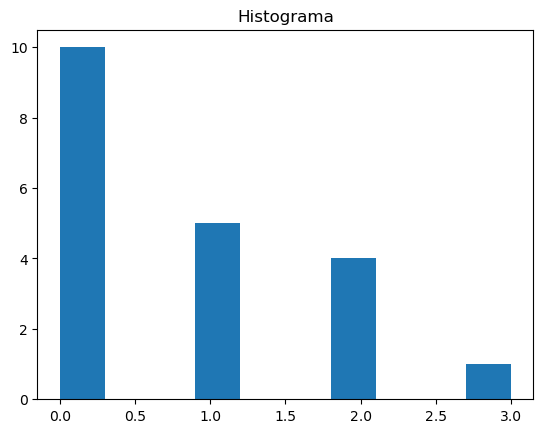

In [36]:
import numpy as np


amostra = np.array([0,1,2,0,0,2,0,1,1,0,0,2,1,0,0,3,0,2,0,1])
histograma(amostra)